In [1]:
import pandas as pd
import numpy as np

In [2]:
demandml_df = pd.read_csv('../datasets/datasets_demand-forecasting-kernels-only_train.csv')
datacoglobal_df = pd.read_csv('../datasets/DataCoSupplyChainDataset.csv', encoding='utf8')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
demandml_df.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
datacoglobal_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
demandml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
datacoglobal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [8]:
demandml_df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [9]:
datacoglobal_df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [10]:
datacoglobal_df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


# EDA OF DEMAND ML DATA

In [11]:
import sweetviz

In [12]:
#demandml_report = sweetviz.analyze([demandml_df,'DemandML'], target_feat='sales')

In [13]:
#demandml_report.show_html('demandml_report.html')

# EDA Dataco global

In [14]:
#datacoglobal_report = sweetviz.analyze([datacoglobal_df,'DataCo report'], target_feat='Sales')

In [15]:
#datacoglobal_report.show_html('Datacoglobal_report.html')

In [16]:
datacoglobal_df.shape

(180519, 53)

In [17]:
demandml_df.shape

(913000, 4)

In [18]:
datacoglobal_df['Order Country']

0         Indonesia
1             India
2             India
3         Australia
4         Australia
            ...    
180514        China
180515        Japón
180516    Australia
180517    Australia
180518        India
Name: Order Country, Length: 180519, dtype: object

In [19]:
countries_of_intrest = ['Estados Unidos', 'India']
print('|'.join(countries_of_intrest))

Estados Unidos|India


In [20]:
datacoglobal_df_IndiaUS = datacoglobal_df[datacoglobal_df['Order Country'].str.contains('|'.join(countries_of_intrest))]

In [21]:
datacoglobal_df_IndiaUS['Order Country'].unique()

array(['India', 'Estados Unidos'], dtype=object)

In [22]:
datacoglobal_df_IndiaUS.shape

(29623, 53)

In [23]:
#get all states of 
filter = datacoglobal_df_IndiaUS['Order Country'] == 'India'
states_of_India = datacoglobal_df_IndiaUS.where(filter)['Order State'].unique()
print(states_of_India.shape)
states_of_India


(26,)


array(['Rajastán', 'Maharashtra', 'Madhya Pradesh', 'Delhi', 'Karnataka',
       'Uttar Pradesh', nan, 'Guyarat', 'Chhattisgarh', 'Haryana',
       'Bihar', 'Telangana', 'Andhra Pradesh', 'Bengala Occidental',
       'Jharkhand', 'Tamil Nadu', 'Assam', 'Uttarakhand', 'Kerala',
       'Manipur', 'Odisha', 'Punyab', 'Jammu y Cachemira', 'Chandigarh',
       'Puducherry', 'Tripura'], dtype=object)

In [24]:
datacoglobal_df_IndiaUS.where(filter)['Order State'].value_counts()


Maharashtra           905
Uttar Pradesh         596
Tamil Nadu            366
Karnataka             335
Rajastán              312
Guyarat               272
Madhya Pradesh        248
Andhra Pradesh        215
Bihar                 194
Delhi                 182
Chhattisgarh          167
Telangana             151
Bengala Occidental    140
Haryana               122
Punyab                105
Kerala                 94
Jharkhand              76
Assam                  60
Odisha                 58
Uttarakhand            53
Jammu y Cachemira      53
Puducherry             38
Chandigarh             18
Manipur                17
Tripura                 6
Name: Order State, dtype: int64

In [25]:
datacoglobal_filterd_df = datacoglobal_df_IndiaUS[['Days for shipping (real)','Days for shipment (scheduled)','Order Region','Order Country','Order State','Order City','Latitude','Longitude','Shipping Mode','Type']]

In [26]:
datacoglobal_filterd_df['Late Delivery In Days'] = datacoglobal_filterd_df['Days for shipping (real)'] - datacoglobal_filterd_df['Days for shipment (scheduled)']

/home/abhishekp7/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
datacoglobal_filterd_df.head()

,Days for shipping (real),Days for shipment (scheduled),Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days
1,5,4,South Asia,India,Rajastán,Bikaner,18.279451,-66.037064,Standard Class,TRANSFER,1
2,4,4,South Asia,India,Rajastán,Bikaner,37.292233,-121.881279,Standard Class,CASH,0
13,2,1,South Asia,India,Maharashtra,Sangli,18.278439,-66.037056,First Class,DEBIT,1
14,2,1,South Asia,India,Maharashtra,Sangli,42.526276,-70.927032,First Class,TRANSFER,1
15,2,1,South Asia,India,Maharashtra,Sangli,18.284050,-66.037056,First Class,DEBIT,1


In [28]:
datacoglobal_filterd_df.drop(columns=['Days for shipping (real)','Days for shipment (scheduled)'])

,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days
1,South Asia,India,Rajastán,Bikaner,18.279451,-66.037064,Standard Class,TRANSFER,1
2,South Asia,India,Rajastán,Bikaner,37.292233,-121.881279,Standard Class,CASH,0
13,South Asia,India,Maharashtra,Sangli,18.278439,-66.037056,First Class,DEBIT,1
14,South Asia,India,Maharashtra,Sangli,42.526276,-70.927032,First Class,TRANSFER,1
15,South Asia,India,Maharashtra,Sangli,18.284050,-66.037056,First Class,DEBIT,1
...,...,...,...,...,...,...,...,...,...
180488,South Asia,India,Jharkhand,Ranchi,18.267492,-66.370567,Standard Class,PAYMENT,-2
180490,South Asia,India,Madhya Pradesh,Ratlam,36.970711,-120.058853,Standard Class,TRANSFER,0
180493,South Asia,India,Andhra Pradesh,Tirupati,28.516270,-81.305832,Standard Class,DEBIT,-2
180494,South Asia,India,Andhra Pradesh,Tirupati,28.516270,-81.305832,Standard Class,DEBIT,-2


In [29]:
datacoglobal_filterd_df['Late Delivery In Days'].unique()

array([ 1,  0,  2,  3,  4, -2, -1])

In [30]:
datacoglobal_filterd_df = datacoglobal_filterd_df.replace(to_replace=["Estados Unidos"], value="United States")

In [31]:
datacoglobal_filterd_df['Order Country'].unique()

array(['India', 'United States'], dtype=object)

In [32]:
states_of_India

array(['Rajastán', 'Maharashtra', 'Madhya Pradesh', 'Delhi', 'Karnataka',
       'Uttar Pradesh', nan, 'Guyarat', 'Chhattisgarh', 'Haryana',
       'Bihar', 'Telangana', 'Andhra Pradesh', 'Bengala Occidental',
       'Jharkhand', 'Tamil Nadu', 'Assam', 'Uttarakhand', 'Kerala',
       'Manipur', 'Odisha', 'Punyab', 'Jammu y Cachemira', 'Chandigarh',
       'Puducherry', 'Tripura'], dtype=object)

# Translate States

In [33]:
from googletrans import Translator
translator = Translator()
states_traslate_df = pd.DataFrame({'States':datacoglobal_filterd_df['Order State'].unique()})
states_traslate_df['State traslated'] = states_traslate_df['States'].apply(translator.translate, src='es', dest='en').apply(getattr, args=('text',))
states_traslate_df

,States,State traslated
0,Rajastán,Rajasthan
1,Maharashtra,Maharashtra
2,Madhya Pradesh,Madhya pradesh
3,Delhi,Delhi
4,Karnataka,Karnataka
...,...,...
68,Tripura,Tripura
69,Vermont,Vermont
70,Montana,Montana
71,Dakota del Sur,South Dakota


In [34]:
datacoglobal_filterd_df = datacoglobal_filterd_df.replace(to_replace=list(states_traslate_df['States']),value=list(states_traslate_df['State traslated']))
filter = datacoglobal_df_IndiaUS['Order Country'] == 'India'
states_of_India = datacoglobal_filterd_df.where(filter)['Order State'].unique()
states_of_India

array(['Rajasthan', 'Maharashtra', 'Madhya pradesh', 'Delhi', 'Karnataka',
       'Uttar Pradesh', nan, 'Gujarat', 'Chhattisgarh', 'Haryana',
       'Bihar', 'Telangana', 'Andhra Pradesh', 'West bengal', 'Jharkhand',
       'Tamil nadu', 'Assam', 'Uttarakhand', 'Kerala', 'Manipur',
       'Odisha', 'Punjab', 'Jammu and Kashmir', 'Chandigarh',
       'Puducherry', 'Tripura'], dtype=object)

In [35]:
datacoglobal_filterd_df['Order State'].unique()

array(['Rajasthan', 'Maharashtra', 'Madhya pradesh', 'Delhi', 'Karnataka',
       'Uttar Pradesh', 'Washington', 'California', 'Kansas', 'Texas',
       'Arizona', 'Ohio', 'Indiana', 'Pennsylvania', 'Illinois',
       'Gujarat', 'Chhattisgarh', 'Haryana', 'Bihar', 'New York',
       'North Carolina', 'Colorado', 'Florida', 'Telangana',
       'Andhra Pradesh', 'West bengal', 'Jharkhand', 'Tamil nadu',
       'Oklahoma', 'Assam', 'Uttarakhand', 'Kerala', 'Maryland',
       'Georgia', 'Alabama', 'Massachusetts', 'Virginia', 'Nevada',
       'Michigan', 'Minnesota', 'Nebraska', 'Connecticut', 'Kentucky',
       'Delaware', 'Tennessee', 'Arkansas', 'Missouri', 'Oregon', 'Maine',
       'New Jersey', 'W.V.', 'Mississippi', 'Manipur', 'Odisha', 'Punjab',
       'Jammu and Kashmir', 'South Carolina', 'Wisconsin', 'New Mexico',
       'Louisiana', 'Chandigarh', 'Rhode Island', 'Utah', 'New Hampshire',
       'Idaho', 'D.C.', 'Puducherry', 'Iowa', 'Tripura', 'Vermont',
       'Montana', 'South 

# Traslate Cities

In [36]:
from googletrans import Translator
translator = Translator()
cities_traslate_df = pd.DataFrame({'Cities':datacoglobal_filterd_df['Order City'].unique()})
cities_traslate_df['Cities traslated'] = cities_traslate_df['Cities'].apply(translator.translate, src='es', dest='en').apply(getattr, args=('text',))
cities_traslate_df

,Cities,Cities traslated
0,Bikaner,Bikaner
1,Sangli,Sangli
2,Jabalpur,Jabalpur
3,Delhi,Delhi
4,Hubli,Hubli
...,...,...
650,Missoula,Missoula
651,Lindenhurst,Lindenhurst
652,Yucaipa,Yucaipa
653,Pico Rivera,Rivera Peak


In [37]:
datacoglobal_filterd_df = datacoglobal_filterd_df.replace(to_replace=list(cities_traslate_df['Cities']),value=list(cities_traslate_df['Cities traslated']))


In [38]:
datacoglobal_filterd_df['Order City'].unique()

array(['Bikaner', 'Sangli', 'Jabalpur', 'Delhi', 'Hubli', 'Bangalore',
       'Mirzapur', 'Raipur', 'Pasco', 'The Angels', 'San Francisco',
       'Overland park', 'Houston', 'Gilbert', 'Saint Joseph', 'ash tree',
       'Peoria', 'Cincinnati', 'Columbus', 'Philadelphia', 'Des plaines',
       'Elmhurst', 'Kanpur', 'Ulhasnagar', 'Ajmer', 'Vadodara', 'Bhilai',
       'Ujjain', 'Pune', 'Rajkot', 'Gorakhpur', 'Nagpur', 'Jaipur',
       'Aurangabad', 'Seattle', 'Oakland', 'New York City', 'Monroe',
       'Denver', 'Jacksonville', 'Hyderabad', 'Vijayawada', 'Thane',
       'Mumbai', 'Durgapur', 'Bhavnagar', 'Mangalore', 'Ranchi', 'Durg',
       'Belgaum', 'Solapur', 'Bihar sharif', 'Patna', 'Faridabad',
       'Madurai', 'Fatehpur', 'Ichalkaranji', 'Kota', 'Tulsa',
       'Moreno Valley', 'Guwahati', 'Gwalior', 'Visakhapatnam', 'Kollam',
       'Nellore', 'Clinton', 'Oswego', 'Saint Charles', 'Decatur',
       'Costa Mesa', 'Asheville', 'Florence', 'Lowell', 'Akron',
       'Springfield', 

In [39]:
print(list(datacoglobal_df['Order City'].unique()))

['Bekasi', 'Bikaner', 'Townsville', 'Toowoomba', 'Guangzhou', 'Tokio', 'Manado', 'Sangli', 'Seúl', 'Jabalpur', 'Geelong', 'Brisbane', 'Mandurah', 'Guilin', 'Delhi', 'Suzhou', 'Singapur', 'Hubli', 'Wollongong', 'Medan', 'Canberra', 'Bangalore', 'Yiwu', 'Mirzapur', 'Bursa', 'Murray Bridge', 'Kartal', 'Ulan Bator', 'Estambul', 'Raipur', 'Pasco', 'Los Angeles', 'San Francisco', 'Overland Park', 'Ugep', 'Kinshasa', 'Dakar', 'Casablanca', 'Dortmund', 'Drancy', 'Nantes', 'Groningen', 'Gateshead', 'Eastbourne', 'Hayange', 'Portsmouth', 'Gelsenkirchen', 'Nice', 'Petapa', 'Mejicanos', 'David', 'Santo Domingo', 'Cabimas', 'Dos Quebradas', 'Ilopango', 'Tegucigalpa', 'Juazeiro', 'Mexico City', 'Tlaquepaque', 'Puebla', 'São Paulo', 'Montevideo', 'Buenos Aires', 'Barueri', 'Arapongas', 'Camagüey', 'Las Tunas', 'Tepic', 'San Miguelito', 'Ixtapaluca', 'Maceió', 'Belo Horizonte', 'Santiago de Cuba', 'San Pedro Sula', 'Lima', 'Holguín', 'Orizaba', 'Managua', 'Villahermosa', 'Quixadá', 'Mixco', 'Nueva Ger

In [40]:
datacoglobal_filterd_df['Order Region'].unique()

array(['South Asia', 'West of USA ', 'US Center ', 'East of USA',
       'South of  USA '], dtype=object)

In [41]:
datacoglobal_filterd_df = datacoglobal_filterd_df.drop(columns=['Days for shipping (real)','Days for shipment (scheduled)'])

In [42]:
datacoglobal_filterd_df

,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days
1,South Asia,India,Rajasthan,Bikaner,18.279451,-66.037064,Standard Class,TRANSFER,1
2,South Asia,India,Rajasthan,Bikaner,37.292233,-121.881279,Standard Class,CASH,0
13,South Asia,India,Maharashtra,Sangli,18.278439,-66.037056,First Class,DEBIT,1
14,South Asia,India,Maharashtra,Sangli,42.526276,-70.927032,First Class,TRANSFER,1
15,South Asia,India,Maharashtra,Sangli,18.284050,-66.037056,First Class,DEBIT,1
...,...,...,...,...,...,...,...,...,...
180488,South Asia,India,Jharkhand,Ranchi,18.267492,-66.370567,Standard Class,PAYMENT,-2
180490,South Asia,India,Madhya pradesh,Ratlam,36.970711,-120.058853,Standard Class,TRANSFER,0
180493,South Asia,India,Andhra Pradesh,Tirupati,28.516270,-81.305832,Standard Class,DEBIT,-2
180494,South Asia,India,Andhra Pradesh,Tirupati,28.516270,-81.305832,Standard Class,DEBIT,-2


In [43]:
datacoglobal_filterd_df.shape

(29623, 9)

In [44]:
demandml_df.shape

(913000, 4)

In [45]:
datacoglobal_filterd_df.sample(frac=1)

,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days
135766,West of USA,United States,Utah,Pleasant Grove,42.365345,-87.835899,Standard Class,TRANSFER,0
22481,South Asia,India,Karnataka,Belgaum,18.261675,-66.370613,Standard Class,DEBIT,0
99475,East of USA,United States,Maryland,Columbia,34.117508,-116.484459,Standard Class,DEBIT,1
152600,West of USA,United States,Washington,Seattle,18.222963,-66.370628,Standard Class,TRANSFER,0
156453,South Asia,India,Gujarat,Surat,18.212028,-66.037056,First Class,TRANSFER,1
...,...,...,...,...,...,...,...,...,...
14941,West of USA,United States,California,San Diego,40.040562,-74.158875,Standard Class,TRANSFER,0
152644,West of USA,United States,California,San Francisco,18.224232,-66.370590,Second Class,PAYMENT,2
92883,South Asia,India,Andhra Pradesh,Visakhapatnam,18.247578,-66.025459,First Class,TRANSFER,1
154118,US Center,United States,Illinois,Decatur,18.279663,-66.370575,Standard Class,PAYMENT,2


In [46]:
913000/29623

30.820646119569254

In [47]:
populated_dataco = datacoglobal_filterd_df
for i in range (0,30):
    #print(i)
    populated_dataco = populated_dataco.append(datacoglobal_filterd_df.sample(frac=1),ignore_index=True)
populated_dataco.shape

(918313, 9)

In [48]:
populated_dataco.head()

,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days
0,South Asia,India,Rajasthan,Bikaner,18.279451,-66.037064,Standard Class,TRANSFER,1
1,South Asia,India,Rajasthan,Bikaner,37.292233,-121.881279,Standard Class,CASH,0
2,South Asia,India,Maharashtra,Sangli,18.278439,-66.037056,First Class,DEBIT,1
3,South Asia,India,Maharashtra,Sangli,42.526276,-70.927032,First Class,TRANSFER,1
4,South Asia,India,Maharashtra,Sangli,18.284050,-66.037056,First Class,DEBIT,1


In [49]:
918313-913000

5313

In [50]:
populated_dataco = populated_dataco.iloc[:-5313]
populated_dataco.shape

(913000, 9)

In [51]:
populated_dataco.head()

,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days
0,South Asia,India,Rajasthan,Bikaner,18.279451,-66.037064,Standard Class,TRANSFER,1
1,South Asia,India,Rajasthan,Bikaner,37.292233,-121.881279,Standard Class,CASH,0
2,South Asia,India,Maharashtra,Sangli,18.278439,-66.037056,First Class,DEBIT,1
3,South Asia,India,Maharashtra,Sangli,42.526276,-70.927032,First Class,TRANSFER,1
4,South Asia,India,Maharashtra,Sangli,18.284050,-66.037056,First Class,DEBIT,1


In [52]:
Merged_demandml_dataset = pd.concat([demandml_df, populated_dataco], axis=1)
Merged_demandml_dataset.head()

,date,store,item,sales,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days
0,2013-01-01,1,1,13,South Asia,India,Rajasthan,Bikaner,18.279451,-66.037064,Standard Class,TRANSFER,1
1,2013-01-02,1,1,11,South Asia,India,Rajasthan,Bikaner,37.292233,-121.881279,Standard Class,CASH,0
2,2013-01-03,1,1,14,South Asia,India,Maharashtra,Sangli,18.278439,-66.037056,First Class,DEBIT,1
3,2013-01-04,1,1,13,South Asia,India,Maharashtra,Sangli,42.526276,-70.927032,First Class,TRANSFER,1
4,2013-01-05,1,1,10,South Asia,India,Maharashtra,Sangli,18.284050,-66.037056,First Class,DEBIT,1


In [53]:
Merged_demandml_dataset.shape

(913000, 13)

In [54]:
Merged_demandml_dataset.isnull().sum()

date                     0
store                    0
item                     0
sales                    0
Order Region             0
Order Country            0
Order State              0
Order City               0
Latitude                 0
Longitude                0
Shipping Mode            0
Type                     0
Late Delivery In Days    0
dtype: int64

In [55]:
Merged_demandml_dataset.columns

Index(['date', 'store', 'item', 'sales', 'Order Region', 'Order Country',
       'Order State', 'Order City', 'Latitude', 'Longitude', 'Shipping Mode',
       'Type', 'Late Delivery In Days'],
      dtype='object')

In [56]:
Merged_demandml_dataset = Merged_demandml_dataset[['date', 'store', 'item', 'Order Region', 'Order Country',
       'Order State', 'Order City', 'Latitude', 'Longitude', 'Shipping Mode',
       'Type', 'Late Delivery In Days','sales']]

In [57]:
Merged_demandml_dataset.head()

,date,store,item,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days,sales
0,2013-01-01,1,1,South Asia,India,Rajasthan,Bikaner,18.279451,-66.037064,Standard Class,TRANSFER,1,13
1,2013-01-02,1,1,South Asia,India,Rajasthan,Bikaner,37.292233,-121.881279,Standard Class,CASH,0,11
2,2013-01-03,1,1,South Asia,India,Maharashtra,Sangli,18.278439,-66.037056,First Class,DEBIT,1,14
3,2013-01-04,1,1,South Asia,India,Maharashtra,Sangli,42.526276,-70.927032,First Class,TRANSFER,1,13
4,2013-01-05,1,1,South Asia,India,Maharashtra,Sangli,18.284050,-66.037056,First Class,DEBIT,1,10


:item:                             |██████               | [ 29%]   00:45  -> (01:21 left)

KeyboardInterrupt: 

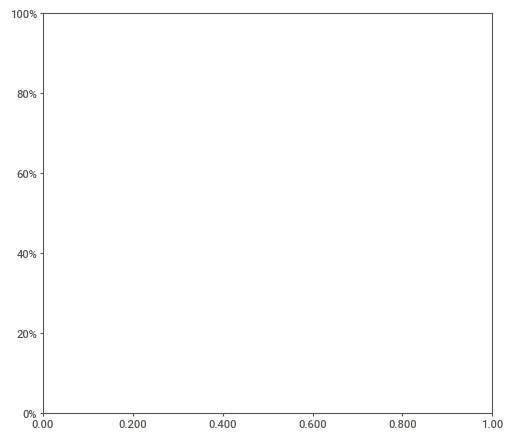

In [58]:
merged_demandml_report = sweetviz.analyze([Merged_demandml_dataset,'merged dataset'],target_feat='sales')


In [ ]:
merged_demandml_report.show_html('merged_demandml_report.html')

In [59]:
Merged_demandml_dataset['Order City'].where(Merged_demandml_dataset['Order State']=='Maharashtra').value_counts()

Mumbai          5138
Pune            4993
Nagpur          2408
Thane           1790
Solapur         1388
Kalyan          1382
Bhiwandi        1168
Durgapur        1108
Pimpri          1081
Amravati         834
Sangli           833
Akola            806
Ulhasnagar       801
Malegaon         771
Kolhapur         616
Parbhani         585
Nasik            585
Dhule            556
Aurangabad       434
Jalna            247
Ichalkaranji     216
Latur            155
Name: Order City, dtype: int64

In [60]:
copy_merged = Merged_demandml_dataset

In [61]:
copy_merged.shape

(913000, 13)

In [62]:
copy_merged.head()

,date,store,item,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days,sales
0,2013-01-01,1,1,South Asia,India,Rajasthan,Bikaner,18.279451,-66.037064,Standard Class,TRANSFER,1,13
1,2013-01-02,1,1,South Asia,India,Rajasthan,Bikaner,37.292233,-121.881279,Standard Class,CASH,0,11
2,2013-01-03,1,1,South Asia,India,Maharashtra,Sangli,18.278439,-66.037056,First Class,DEBIT,1,14
3,2013-01-04,1,1,South Asia,India,Maharashtra,Sangli,42.526276,-70.927032,First Class,TRANSFER,1,13
4,2013-01-05,1,1,South Asia,India,Maharashtra,Sangli,18.284050,-66.037056,First Class,DEBIT,1,10


In [63]:
#Add a City in Himachal Pradesh by eleminating one city in Maharashtra
copy_merged = copy_merged.replace(to_replace=['Latur'],value='Shimla')


In [64]:
copy_merged[copy_merged['Order City'] == 'Shimla']

,date,store,item,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days,sales
14478,2017-08-24,8,1,South Asia,India,Maharashtra,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,29
14480,2017-08-26,8,1,South Asia,India,Maharashtra,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,37
20210,2013-05-05,2,2,South Asia,India,Maharashtra,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,93
20419,2013-11-30,2,2,South Asia,India,Maharashtra,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,68
26033,2014-04-15,5,2,South Asia,India,Maharashtra,Shimla,18.221277,-66.037056,First Class,TRANSFER,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889616,2013-12-21,8,49,South Asia,India,Maharashtra,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,20
891903,2015-03-27,9,49,South Asia,India,Maharashtra,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,27
897925,2016-09-21,2,50,South Asia,India,Maharashtra,Shimla,18.221277,-66.037056,First Class,TRANSFER,1,106
905899,2013-07-23,7,50,South Asia,India,Maharashtra,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,38


In [65]:
copy_merged.loc[copy_merged['Order City'] == 'Shimla', 'Order State'] = 'Himachal Pradesh'
copy_merged[copy_merged['Order City'] == 'Shimla']

,date,store,item,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days,sales
14478,2017-08-24,8,1,South Asia,India,Himachal Pradesh,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,29
14480,2017-08-26,8,1,South Asia,India,Himachal Pradesh,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,37
20210,2013-05-05,2,2,South Asia,India,Himachal Pradesh,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,93
20419,2013-11-30,2,2,South Asia,India,Himachal Pradesh,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,68
26033,2014-04-15,5,2,South Asia,India,Himachal Pradesh,Shimla,18.221277,-66.037056,First Class,TRANSFER,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889616,2013-12-21,8,49,South Asia,India,Himachal Pradesh,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,20
891903,2015-03-27,9,49,South Asia,India,Himachal Pradesh,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,27
897925,2016-09-21,2,50,South Asia,India,Himachal Pradesh,Shimla,18.221277,-66.037056,First Class,TRANSFER,1,106
905899,2013-07-23,7,50,South Asia,India,Himachal Pradesh,Shimla,33.046471,-117.289673,Standard Class,DEBIT,1,38


In [66]:
copy_merged['Order City'].where(copy_merged['Order State']=='Maharashtra').value_counts()

Mumbai          5138
Pune            4993
Nagpur          2408
Thane           1790
Solapur         1388
Kalyan          1382
Bhiwandi        1168
Durgapur        1108
Pimpri          1081
Amravati         834
Sangli           833
Akola            806
Ulhasnagar       801
Malegaon         771
Kolhapur         616
Parbhani         585
Nasik            585
Dhule            556
Aurangabad       434
Jalna            247
Ichalkaranji     216
Name: Order City, dtype: int64

In [67]:
#Add a city in Goa by eleminating one state from Maharashtra
copy_merged = copy_merged.replace(to_replace=['Ichalkaranji'],value='Panaji')
copy_merged.loc[copy_merged['Order City'] == 'Panaji', 'Order State'] = 'Goa'
copy_merged[copy_merged['Order City'] == 'Panaji']

,date,store,item,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days,sales
122,2013-05-03,1,1,South Asia,India,Goa,Panaji,39.398541,-84.556618,Second Class,DEBIT,1,22
14449,2017-07-26,8,1,South Asia,India,Goa,Panaji,29.555525,-95.712898,Standard Class,DEBIT,-2,36
14500,2017-09-15,8,1,South Asia,India,Goa,Panaji,29.555525,-95.712898,Standard Class,DEBIT,-2,31
14537,2017-10-22,8,1,South Asia,India,Goa,Panaji,29.555525,-95.712898,Standard Class,DEBIT,-2,54
15413,2015-03-17,9,1,South Asia,India,Goa,Panaji,42.459389,-73.226730,Second Class,DEBIT,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895696,2015-08-15,1,50,South Asia,India,Goa,Panaji,29.555525,-95.712898,Standard Class,DEBIT,-2,79
901483,2016-06-19,4,50,South Asia,India,Goa,Panaji,29.555525,-95.712898,Standard Class,DEBIT,-2,104
904100,2013-08-19,6,50,South Asia,India,Goa,Panaji,29.555525,-95.712898,Standard Class,DEBIT,-2,39
909680,2013-11-29,9,50,South Asia,India,Goa,Panaji,18.261908,-66.370544,First Class,TRANSFER,1,63


In [68]:
#Add a city in Sikkim by eleminating one state from Maharashtra
copy_merged = copy_merged.replace(to_replace=['Jalna'],value='Gangtok')
copy_merged.loc[copy_merged['Order City'] == 'Gangtok', 'Order State'] = 'Sikkim'
copy_merged[copy_merged['Order City'] == 'Gangtok']

,date,store,item,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days,sales
8268,2015-08-23,5,1,South Asia,India,Sikkim,Gangtok,39.646053,-86.119614,Standard Class,DEBIT,0,31
8341,2015-11-04,5,1,South Asia,India,Sikkim,Gangtok,18.268370,-66.370567,Standard Class,DEBIT,-1,15
8477,2016-03-19,5,1,South Asia,India,Sikkim,Gangtok,18.268370,-66.370567,Standard Class,DEBIT,-1,14
8480,2016-03-22,5,1,South Asia,India,Sikkim,Gangtok,18.268370,-66.370567,Standard Class,DEBIT,-1,19
8594,2016-07-14,5,1,South Asia,India,Sikkim,Gangtok,18.268370,-66.370567,Standard Class,DEBIT,-1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
892945,2013-02-01,10,49,South Asia,India,Sikkim,Gangtok,39.548809,-104.942230,Standard Class,PAYMENT,1,24
908134,2014-09-05,8,50,South Asia,India,Sikkim,Gangtok,18.268370,-66.370567,Standard Class,DEBIT,-1,89
910711,2016-09-25,9,50,South Asia,India,Sikkim,Gangtok,18.268370,-66.370567,Standard Class,DEBIT,-1,84
911523,2013-12-16,10,50,South Asia,India,Sikkim,Gangtok,39.646053,-86.119614,Standard Class,DEBIT,0,40


In [69]:
#Add a city in Arunachal Pradesh by eleminating one city from Maharashtra
copy_merged = copy_merged.replace(to_replace=['Aurangabad'],value='Itanagar')
copy_merged.loc[copy_merged['Order City'] == 'Itanagar', 'Order State'] = 'Arunachal Pradesh'
copy_merged[copy_merged['Order City'] == 'Itanagar']

,date,store,item,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days,sales
61,2013-03-03,1,1,South Asia,India,Arunachal Pradesh,Itanagar,18.291248,-66.370567,Second Class,PAYMENT,1,20
96,2013-04-07,1,1,South Asia,India,Arunachal Pradesh,Itanagar,32.842922,-97.226158,Standard Class,TRANSFER,-1,17
364,2013-12-31,1,1,South Asia,India,Arunachal Pradesh,Itanagar,18.229628,-66.370537,Standard Class,PAYMENT,-1,15
371,2014-01-07,1,1,South Asia,India,Arunachal Pradesh,Itanagar,18.229628,-66.370537,Standard Class,PAYMENT,-1,11
517,2014-06-02,1,1,South Asia,India,Arunachal Pradesh,Itanagar,32.842922,-97.226158,Standard Class,TRANSFER,-1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911076,2017-09-25,9,50,South Asia,India,Arunachal Pradesh,Itanagar,18.205357,-66.370598,Standard Class,PAYMENT,2,81
911428,2013-09-12,10,50,South Asia,India,Arunachal Pradesh,Itanagar,18.291248,-66.370567,Second Class,PAYMENT,1,61
911464,2013-10-18,10,50,South Asia,India,Arunachal Pradesh,Itanagar,18.263477,-66.370628,Standard Class,DEBIT,2,59
912505,2016-08-24,10,50,South Asia,India,Arunachal Pradesh,Itanagar,34.071850,-80.958572,Standard Class,CASH,-2,90


In [70]:
#Add a city in NagaLand by eleminating one city from Maharashtra
copy_merged = copy_merged.replace(to_replace=['Dhule'],value='Kohima')
copy_merged.loc[copy_merged['Order City'] == 'Kohima', 'Order State'] = 'Nagaland'
copy_merged[copy_merged['Order City'] == 'Kohima']

,date,store,item,Order Region,Order Country,Order State,Order City,Latitude,Longitude,Shipping Mode,Type,Late Delivery In Days,sales
710,2014-12-12,1,1,South Asia,India,Nagaland,Kohima,18.200869,-66.370544,Standard Class,PAYMENT,0,10
1130,2016-02-05,1,1,South Asia,India,Nagaland,Kohima,18.251234,-66.370529,Standard Class,CASH,-2,14
1131,2016-02-06,1,1,South Asia,India,Nagaland,Kohima,18.251234,-66.370529,Standard Class,CASH,-2,14
3243,2016-11-18,2,1,South Asia,India,Nagaland,Kohima,18.270401,-66.037056,Standard Class,DEBIT,2,42
3252,2016-11-27,2,1,South Asia,India,Nagaland,Kohima,18.401430,-65.973648,Standard Class,DEBIT,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
908020,2014-05-14,8,50,South Asia,India,Nagaland,Kohima,26.114260,-80.162354,Standard Class,DEBIT,2,101
908260,2015-01-09,8,50,South Asia,India,Nagaland,Kohima,26.114260,-80.162354,Standard Class,DEBIT,2,66
911211,2013-02-07,10,50,South Asia,India,Nagaland,Kohima,18.251234,-66.370529,Standard Class,CASH,-2,63
912418,2016-05-29,10,50,South Asia,India,Nagaland,Kohima,18.251234,-66.370529,Standard Class,CASH,-2,102


In [71]:
copy_merged.to_csv('Forecast.csv')